#Call Libraries

In [ ]:

import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# For Displaying outputs of all commands from a cell and not just for the last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings   # Import warnings module
# To do not print warnings on screen
warnings.filterwarnings("ignore")

import zipfile # To help read zip file
from sklearn.compose import ColumnTransformer

# For splitting dataset into training and testing data
from sklearn.model_selection import train_test_split


# Transformers :
# Class for imputing missing values
from sklearn.impute import SimpleImputer

# One hot encoder for categorical data
from sklearn.preprocessing import OneHotEncoder as onehot

# For Scaling numeric data
from sklearn.preprocessing import StandardScaler as ss

# Label encoder for transforming target column
from sklearn.preprocessing import LabelEncoder

# Dimensionality reduction and noise removal
from sklearn.decomposition import PCA

# Data splitting and model parameter search
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from xgboost.sklearn import XGBClassifier

# Model pipelining
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# Hyperparameter optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Estimator
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import set_config
#     pip install scikit-optimize
#     pip install 'scikit-optimize[plots]'
#     Refer: https://github.com/scikit-optimize/scikit-optimize
#     conda install -c conda-forge scikit-optimize
#from skopt import BayesSearchCV 
#from skopt.space import Real, Categorical, Integer

SyntaxError: ignored

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
drive.mount("/gdrive", force_remount=True)

Mounted at /gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os 
path = "/content/drive/MyDrive/BDDA project 1 "


os.chdir(path)
os.listdir()

['Green_Jobs_-_Green_New_York__GJGNY__Residential_Loan_Portfolio___Beginning_November_2010.csv']

READ DATA
# read the dataset using the compression zip

In [ ]:
df=pd.read_csv('Green_Jobs_-_Green_New_York__GJGNY__Residential_Loan_Portfolio___Beginning_November_2010.csv')

In [ ]:
df.head()

,Reporting Period,CONTRACT DATE,SETUP DATE,ORIGINAL LOAN AMOUNT,ORIGINAL TERM,ORIGINAL MATURITY DATE,CURRENT MATURITY DATE,INTEREST RATE,CREDIT SCORE CURRENT HIGH,CREDIT SCORE,CREDIT SCORE NAME 2,DEBT TO INCOME,FIRST PAYMENT DATE,LAST PAYMENT DATE,LAST PAYMENT AMOUNT,NEXT PAYMENT DUE DATE,PAYMENT AMOUNT,CURRENT BALANCE,UNAPPLIED CASH,DELINQUENT AMOUNT,TOTAL INTEREST PAID,TOTAL LATE CHARGE PAID,PAYMENTS REMAINING,DAYS DELINQUENT,PROPERTY COUNTY,UTILITY,INSTALLATION CITY,INSTALLATION ZIP,Contractor Name,SUCCESSOR NUMBER,ACCOUNT CODE,ACCOUNT CODE DATE,CANCEL REASON,TYPE OF BANKRUPTCY,Months Since Origination,Payments Made,Purpose,Loan Type,Underwriting,Pledged,Georeference
0,07/31/2022,03/01/2016,03/01/2016,"11,434.39",180,03/01/2031,05/10/2017,3.49,775.0,775.0,NaN,0.2062,03/31/2016,05/10/2017,"5,292.75",06/01/2017,81.69,0.00,0.0,0.00,425.56,0.00,0,-22,Orange,Central Hudson Gas and Electric,Walden,12586,Accord Power Inc,NaN,Paid in Full,05/10/2017,NaN,NaN,77.0,180.0,Solar (PV),Smart Energy,Tier 1,Series 2015A PV Bonds,POINT (-74.174903 41.563126)
1,07/31/2022,04/29/2016,04/29/2016,"2,239.80",60,04/29/2021,04/01/2021,3.49,703.0,703.0,NaN,0.3065,05/29/2016,05/03/2021,40.17,05/01/2021,40.74,0.00,0.0,0.00,204.03,0.00,0,2,Onondaga,National Grid,Syracuse,13219,AIRTIGHT SERVICES INC,NaN,Paid in Full,05/03/2021,NaN,NaN,75.0,60.0,Energy Efficiency (EE),Smart Energy,Tier 2,Unpledged,POINT (-76.224174 43.04093)
2,07/31/2022,10/16/2015,10/16/2015,"7,380.00",60,10/16/2020,03/04/2019,3.49,674.0,633.0,674.0,0.3382,11/15/2015,03/04/2019,"2,607.62",03/15/2019,134.22,0.00,0.0,0.00,597.18,0.00,0,-11,Tompkins,NYS Electric and Gas,Ithaca,14850,AMERICAN SOLAR PARTNERS,NaN,Paid in Full,03/04/2019,NaN,NaN,81.5,60.0,Solar (PV),Smart Energy,Tier 1,Series 2015A PV Bonds,POINT (-76.497069 42.443738)
3,07/31/2022,10/16/2015,10/16/2015,"10,197.90",60,10/16/2020,07/22/2019,3.49,774.0,774.0,NaN,0.2377,11/15/2015,07/22/2019,"2,719.29",08/15/2019,185.47,0.00,0.0,0.00,868.33,0.00,0,-24,Wayne,NYS Electric and Gas,Newark,14513,AMERICAN SOLAR PARTNERS,NaN,Paid in Full,07/22/2019,NaN,NaN,81.5,60.0,Solar (PV),Smart Energy,Tier 1,Series 2015A PV Bonds,POINT (-77.094618 43.063468)
4,07/31/2022,01/21/2016,01/21/2016,"22,907.00",180,01/21/2031,10/04/2017,3.49,756.0,756.0,NaN,0.2108,02/20/2016,10/04/2017,"7,758.75",10/20/2017,163.65,0.00,0.0,0.00,687.83,0.00,0,-16,Saratoga,National Grid,Stillwater,12170,APEX SOLAR POWER LLC,NaN,Paid in Full,10/04/2017,NaN,NaN,78.3,180.0,Solar (PV),Smart Energy,Tier 1,Series 2015A PV Bonds,POINT (-73.661774 42.995635)


DATA EXPLORATION
#Checking the dataset

df.info()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35970 entries, 0 to 35969
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Reporting Period           35970 non-null  object 
 1   CONTRACT DATE              35970 non-null  object 
 2   SETUP DATE                 35970 non-null  object 
 3   ORIGINAL LOAN AMOUNT       35970 non-null  object 
 4   ORIGINAL TERM              35970 non-null  int64  
 5   ORIGINAL MATURITY DATE     35970 non-null  object 
 6   CURRENT MATURITY DATE      35970 non-null  object 
 7   INTEREST RATE              35970 non-null  float64
 8   CREDIT SCORE CURRENT HIGH  35199 non-null  float64
 9   CREDIT SCORE               35118 non-null  float64
 10  CREDIT SCORE NAME 2        14483 non-null  float64
 11  DEBT TO INCOME             35208 non-null  float64
 12  FIRST PAYMENT DATE         35970 non-null  object 
 13  LAST PAYMENT DATE          35235 non-null  obj

#To print number of null values in each column/feature

In [ ]:
df.isnull().sum()

Reporting Period                 0
CONTRACT DATE                    0
SETUP DATE                       0
ORIGINAL LOAN AMOUNT             0
ORIGINAL TERM                    0
ORIGINAL MATURITY DATE           0
CURRENT MATURITY DATE            0
INTEREST RATE                    0
CREDIT SCORE CURRENT HIGH      771
CREDIT SCORE                   852
CREDIT SCORE NAME 2          21487
DEBT TO INCOME                 762
FIRST PAYMENT DATE               0
LAST PAYMENT DATE              735
LAST PAYMENT AMOUNT              0
NEXT PAYMENT DUE DATE            0
PAYMENT AMOUNT                   0
CURRENT BALANCE                  0
UNAPPLIED CASH                   0
DELINQUENT AMOUNT                0
TOTAL INTEREST PAID              0
TOTAL LATE CHARGE PAID           0
PAYMENTS REMAINING               0
DAYS DELINQUENT                  0
PROPERTY COUNTY                  5
UTILITY                          1
INSTALLATION CITY                5
INSTALLATION ZIP                 5
Contractor Name     

In [ ]:
df.drop([ 'SUCCESSOR NUMBER','Reporting Period', 'ACCOUNT CODE','CANCEL REASON', 'Georeference','Months Since Origination','ACCOUNT CODE DATE','Contractor Name','CONTRACT DATE', 'SETUP DATE', 'ORIGINAL MATURITY DATE','CURRENT MATURITY DATE','FIRST PAYMENT DATE','LAST PAYMENT DATE','PROPERTY COUNTY','INSTALLATION ZIP' ], axis='columns', inplace = True )

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35970 entries, 0 to 35969
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ORIGINAL LOAN AMOUNT       35970 non-null  object 
 1   ORIGINAL TERM              35970 non-null  int64  
 2   INTEREST RATE              35970 non-null  float64
 3   CREDIT SCORE CURRENT HIGH  35199 non-null  float64
 4   CREDIT SCORE               35118 non-null  float64
 5   CREDIT SCORE NAME 2        14483 non-null  float64
 6   DEBT TO INCOME             35208 non-null  float64
 7   LAST PAYMENT AMOUNT        35970 non-null  object 
 8   NEXT PAYMENT DUE DATE      35970 non-null  object 
 9   PAYMENT AMOUNT             35970 non-null  object 
 10  CURRENT BALANCE            35970 non-null  object 
 11  UNAPPLIED CASH             35970 non-null  object 
 12  DELINQUENT AMOUNT          35970 non-null  object 
 13  TOTAL INTEREST PAID        35970 non-null  obj

DATA PREPROCESSING AND CLEANING

In [ ]:
catagorical_features = df.select_dtypes(include=[np.object]).columns 
numerical_features = df.select_dtypes(include=[np.number]).columns

In [ ]:
len(catagorical_features)

17

In [ ]:
len(numerical_features)

8

In [ ]:
for feature in catagorical_features:
    print('\n ')
    print('*************','Column name:',feature,'*************')
    print('Number of Unique values:',df[feature].nunique())
    print('Unique Values:',df[feature].unique())


 
************* Column name: ORIGINAL LOAN AMOUNT *************
Number of Unique values: 23701
Unique Values: ['11,434.39' '2,239.80' '7,380.00' ... '8,570.40' '24,083.60' '6,186.30']

 
************* Column name: LAST PAYMENT AMOUNT *************
Number of Unique values: 18400
Unique Values: ['5,292.75' '40.17' '2,607.62' ... '351.05' '128.07' '3,842.14']

 
************* Column name: NEXT PAYMENT DUE DATE *************
Number of Unique values: 2754
Unique Values: ['06/01/2017' '05/01/2021' '03/15/2019' ... '04/18/2011' '09/05/2020'
 '01/26/2019']

 
************* Column name: PAYMENT AMOUNT *************
Number of Unique values: 14290
Unique Values: ['81.69' '40.74' '134.22' ... '31.50' '87.66' '172.05']

 
************* Column name: CURRENT BALANCE *************
Number of Unique values: 25305
Unique Values: ['0.00' '5,690.48' '3,226.30' ... '15,166.35' '2,650.40' '20,937.81']

 
************* Column name: UNAPPLIED CASH *************
Number of Unique values: 1230
Unique Values: [0.

In [ ]:
percent_miss = 100* df.isnull().sum()/len(df)
percent_miss

ORIGINAL LOAN AMOUNT          0.000000
ORIGINAL TERM                 0.000000
INTEREST RATE                 0.000000
CREDIT SCORE CURRENT HIGH     2.143453
CREDIT SCORE                  2.368641
CREDIT SCORE NAME 2          59.735891
DEBT TO INCOME                2.118432
LAST PAYMENT AMOUNT           0.000000
NEXT PAYMENT DUE DATE         0.000000
PAYMENT AMOUNT                0.000000
CURRENT BALANCE               0.000000
UNAPPLIED CASH                0.000000
DELINQUENT AMOUNT             0.000000
TOTAL INTEREST PAID           0.000000
TOTAL LATE CHARGE PAID        0.000000
PAYMENTS REMAINING            0.000000
DAYS DELINQUENT               0.000000
UTILITY                       0.002780
INSTALLATION CITY             0.013900
TYPE OF BANKRUPTCY           99.165972
Payments Made                 0.000000
Purpose                       0.000000
Loan Type                     0.000000
Underwriting                  0.000000
Pledged                       0.000000
dtype: float64

In [ ]:
np.sum(percent_miss > 50)

2

finding missing values

In [ ]:
missing = [feature for feature in df.columns if percent_miss[feature] > 50]
df.drop(missing, axis=1, inplace=True)

In [ ]:
df.shape

(35970, 23)

removing missing features

In [ ]:
remove_missing_features = [feature for feature in df.columns if percent_miss[feature] < 0.5]
fill_missing_features = [feature for feature in df.columns if percent_miss[feature] > 0.5] 

In [ ]:
# filling in the missing data for features containing many of them
for col in fill_missing_features:
    if col in catagorical_features:
        # For catagorical feature fill missing data with mode
        df[col].fillna(df[col].mode(), inplace=True)
    else:
        # fill missing data with mean
        df[col].fillna(df[col].mean(), inplace=True)

# removing rows with less than 0.5% missing data in them (only a few examples will be deleted )
df.dropna(axis=0, inplace=True)

In [ ]:
df.shape

(35964, 23)

In [ ]:
df.isnull().sum()

ORIGINAL LOAN AMOUNT         0
ORIGINAL TERM                0
INTEREST RATE                0
CREDIT SCORE CURRENT HIGH    0
CREDIT SCORE                 0
DEBT TO INCOME               0
LAST PAYMENT AMOUNT          0
NEXT PAYMENT DUE DATE        0
PAYMENT AMOUNT               0
CURRENT BALANCE              0
UNAPPLIED CASH               0
DELINQUENT AMOUNT            0
TOTAL INTEREST PAID          0
TOTAL LATE CHARGE PAID       0
PAYMENTS REMAINING           0
DAYS DELINQUENT              0
UTILITY                      0
INSTALLATION CITY            0
Payments Made                0
Purpose                      0
Loan Type                    0
Underwriting                 0
Pledged                      0
dtype: int64

# Check for any duplicate columns created

In [ ]:
df.columns.duplicated().sum()

0

In [ ]:
corr=df.corr()
corr['DEBT TO INCOME'].sort_values(ascending=False).head(10)

DEBT TO INCOME               1.000000
PAYMENTS REMAINING           0.087588
ORIGINAL TERM                0.022571
INTEREST RATE               -0.018676
Payments Made               -0.082728
CREDIT SCORE                -0.182741
CREDIT SCORE CURRENT HIGH   -0.190906
Name: DEBT TO INCOME, dtype: float64

<Figure size 1800x1296 with 0 Axes>

Text(0.5, 1.0, 'Pearson correlation')

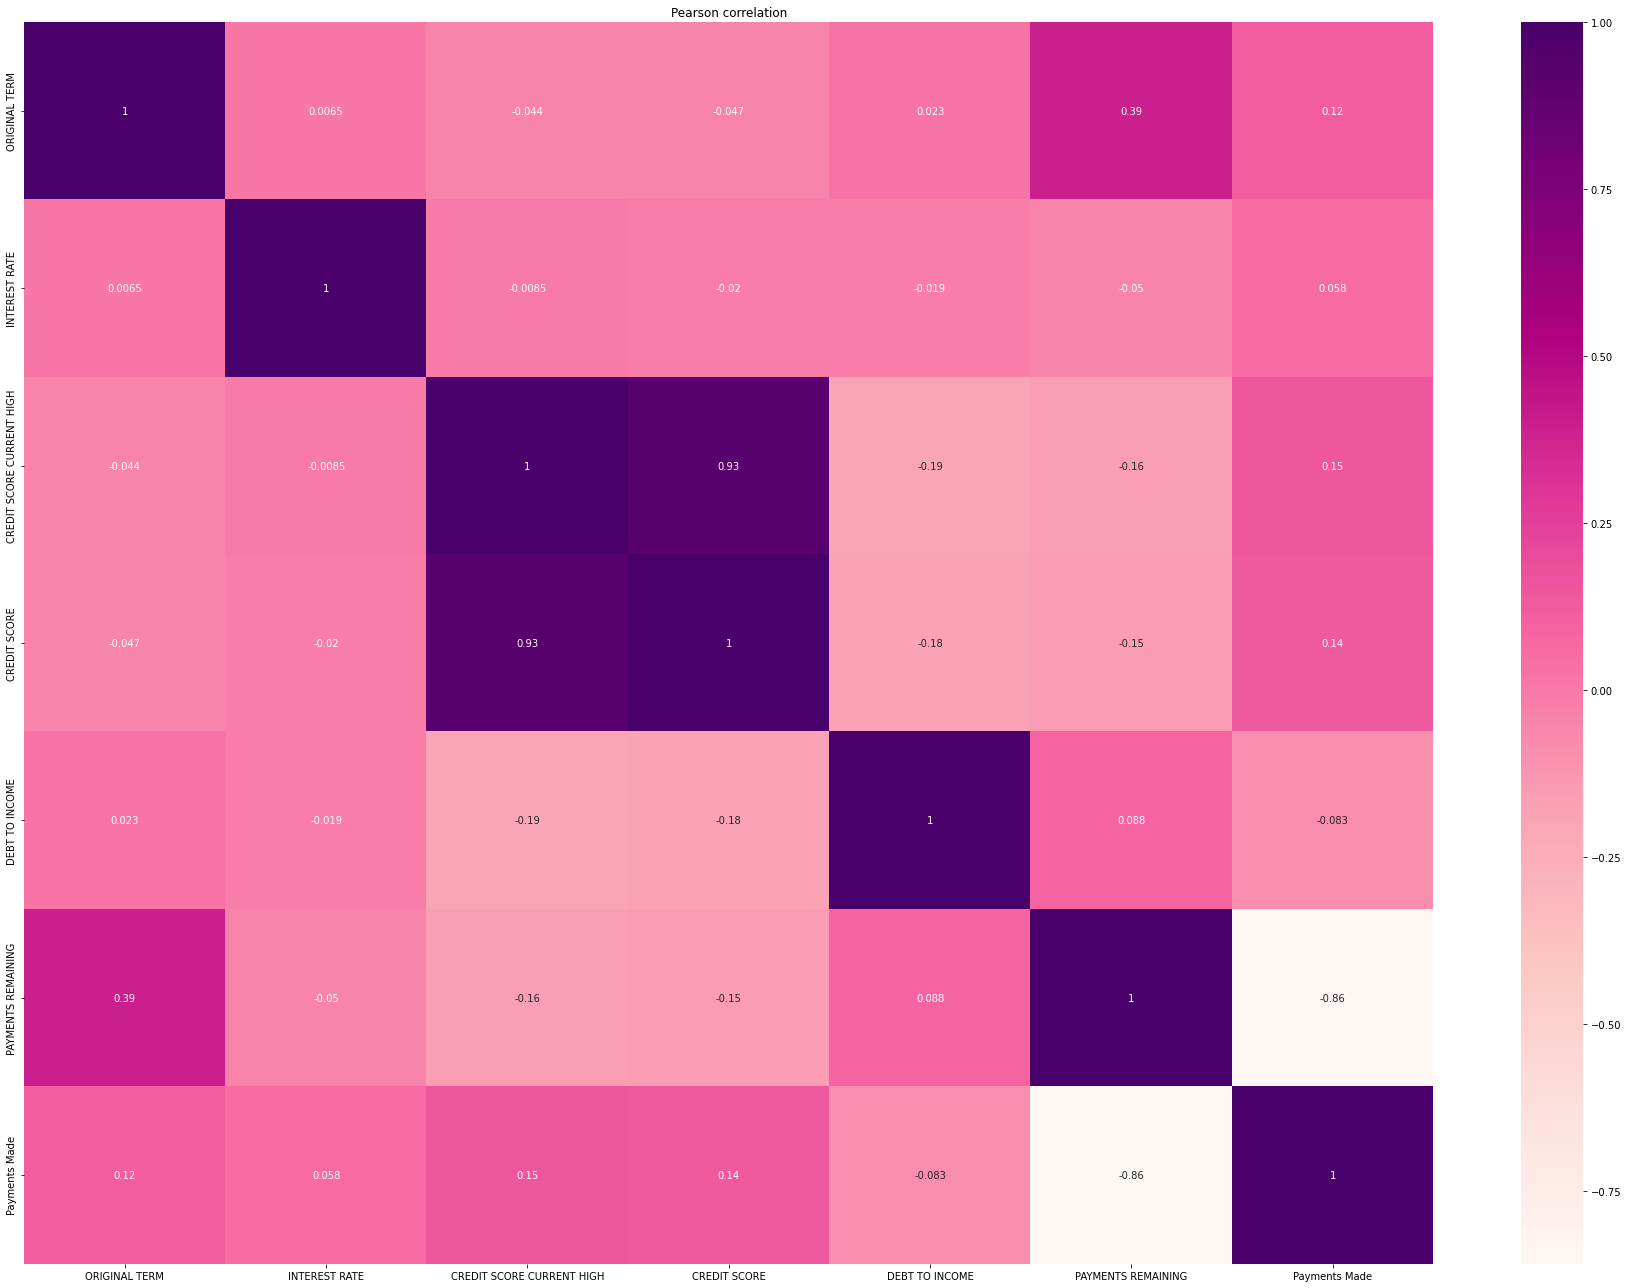

In [ ]:
plt.figure(figsize=(25,18))
_=sns.heatmap(df.corr('pearson'),annot=True,cmap='RdPu');
plt.title('Pearson correlation')
plt.tight_layout()

In [ ]:
def plots(p,predict,train,xlabel):
    plt.plot(p,predict,'g')
    plt.plot(p,train,'b')
    plt.title('Variation of Accuracy')
    plt.xlabel(xlabel)
    plt.ylabel('Accuracy')
    plt.legend(('Test','Train'))

In [ ]:
df.rename(columns = {'DEBT TO INCOME':'DTI'}, inplace = True)

In [ ]:
print(round(df.DTI.value_counts() *100/ df.DTI.count(),2))

0.322697    2.12
0.000000    0.80
1.000000    0.43
0.311900    0.05
0.246700    0.05
            ... 
0.530200    0.00
0.840500    0.00
0.554200    0.00
0.011900    0.00
0.456200    0.00
Name: DTI, Length: 7605, dtype: float64


In [ ]:
cat_cols = df.select_dtypes(include=[np.object]).columns
num_cols =['ORIGINAL TERM','Payments Made','INTEREST RATE', 'CREDIT SCORE CURRENT HIGH', 'CREDIT SCORE',  'DTI', 'PAYMENTS REMAINING']

# Create pipe for both numerical as also categorical data

In [ ]:
nc_pipe = Pipeline([ ('impute', SimpleImputer(strategy = 'median')), ('ss',ss() )])
cat_pipe = Pipeline([('impute', SimpleImputer(strategy = 'most_frequent')), ('ohe', onehot())])

In [ ]:
df = df.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')

# Test each pipe

In [ ]:
nc_pipe.fit_transform(df[num_cols])
cat_pipe.fit_transform(df[cat_cols])

array([[ 0.23786182, -0.3878405 , -0.31747224, ...,  0.72435442,
        -0.63375651, -0.97615414],
       [ 0.91932448,  0.6734553 , -0.31747224, ..., -0.58535439,
        -0.06397864, -0.97615414],
       [ 0.91932448,  0.6734553 , -0.31747224, ..., -1.84123954,
         0.11666878, -0.97615414],
       ...,
       [ 0.23786182, -1.6777231 , -0.84559898, ..., -1.05182602,
        -0.50764416,  1.52692189],
       [ 0.23786182,  0.0856607 ,  0.21065449, ..., -1.50035643,
        -0.20599705, -0.12476774],
       [ 0.23786182, -0.3878405 , -0.84559898, ...,  1.31641456,
        -0.21054164, -0.97615414]])

<35964x124824 sparse matrix of type '<class 'numpy.float64'>'
	with 575424 stored elements in Compressed Sparse Row format>

#Now put the two pipes within one column transformer

In [ ]:
ct = ColumnTransformer(
                        [
                        ('nc_pipe',nc_pipe,num_cols), 
                        ('cat_pipe',cat_pipe,cat_cols)
                        ]
                       )

# Test this column transformer pipe

In [ ]:
ct.fit_transform(df)

<35964x124831 sparse matrix of type '<class 'numpy.float64'>'
	with 827172 stored elements in Compressed Sparse Row format>

# Final pipe to bring in the column-transformer followed by estimator

In [ ]:
pt = Pipeline([ 
                ('ct',ct), 
                ('classifier', DecisionTreeClassifier())])

In [ ]:
y_train = df.DTI
#X_train = df.drop('DTI', axis=1)

In [ ]:
y_train.head()

0    2037
1    3040
2    3358
3    2352
4    2083
Name: DTI, dtype: int64

In [ ]:
X_train

,ORIGINAL LOAN AMOUNT,ORIGINAL TERM,INTEREST RATE,CREDIT SCORE CURRENT HIGH,CREDIT SCORE,LAST PAYMENT AMOUNT,NEXT PAYMENT DUE DATE,PAYMENT AMOUNT,CURRENT BALANCE,UNAPPLIED CASH,DELINQUENT AMOUNT,TOTAL INTEREST PAID,TOTAL LATE CHARGE PAID,PAYMENTS REMAINING,DAYS DELINQUENT,UTILITY,INSTALLATION CITY,Payments Made,Purpose,Loan Type,Underwriting,Pledged
0,2047,81,2,240,269,12801,1151,12665,0,0,508,22480,2,0,88,0,1133,704,4,3,0,7
1,10379,92,2,167,196,11728,922,8965,0,0,508,13967,2,0,793,5,1085,1159,1,3,1,12
2,20251,92,2,138,126,7719,552,2859,0,0,508,25367,2,0,16,4,545,1159,4,3,0,7
3,470,92,2,239,268,7770,1752,6342,0,0,508,29130,2,0,96,4,757,1159,4,3,0,7
4,12919,81,2,221,250,15355,2256,5011,0,0,508,26684,2,0,58,5,1066,704,4,3,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35965,21847,81,2,165,194,274,453,10815,0,0,508,6250,1,0,27,5,748,704,1,3,0,5
35966,13652,81,2,151,180,10869,1034,5624,6600,273,2468,21462,1,5,1338,2,877,1347,1,2,1,11
35967,18681,81,1,141,170,3065,1755,9144,10610,0,508,1811,1,147,51,4,358,151,1,2,0,5
35968,14541,81,3,116,145,7055,711,6328,11643,0,2796,13840,445,50,1383,5,982,907,1,3,0,8


# Fit final pipe on the data

In [ ]:
pt.fit(X_train,y_train)

ValueError: ignored

# Make predictions

In [ ]:
pt.predict(X_train)

In [ ]:
set_config(display='diagram')
pt

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('nc_pipe',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['ORIGINAL TERM',
                                                   'Payments Made',
                                                   'INTEREST RATE',
                                                   'CREDIT SCORE CURRENT HIGH',
                                                   'CREDIT SCORE', 'DTI',
                                                   'PAYMENTS REMAINING']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  Index(['ORIGINAL LOAN AMOUNT', 'LAST PAYMENT AMOUNT', 'NEXT PAYMENT DUE DATE',
       'PAYMENT AMOUNT', 'CURRENT BALANCE', 'UNAPPLIED CASH',
       'DELINQUENT AMOUNT', 'TOTAL INTEREST PAID', 'TOTAL LATE CHARGE PAID',
       'DAYS DELINQUENT', 'UTILITY', 'INSTALLATION CITY', 'Purpose',
       'Loan Type', 'Underwriting', 'Pledged'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier())])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text major ticklabel objects>)

Text(0.5, 1.0, 'Parallel chart with data')

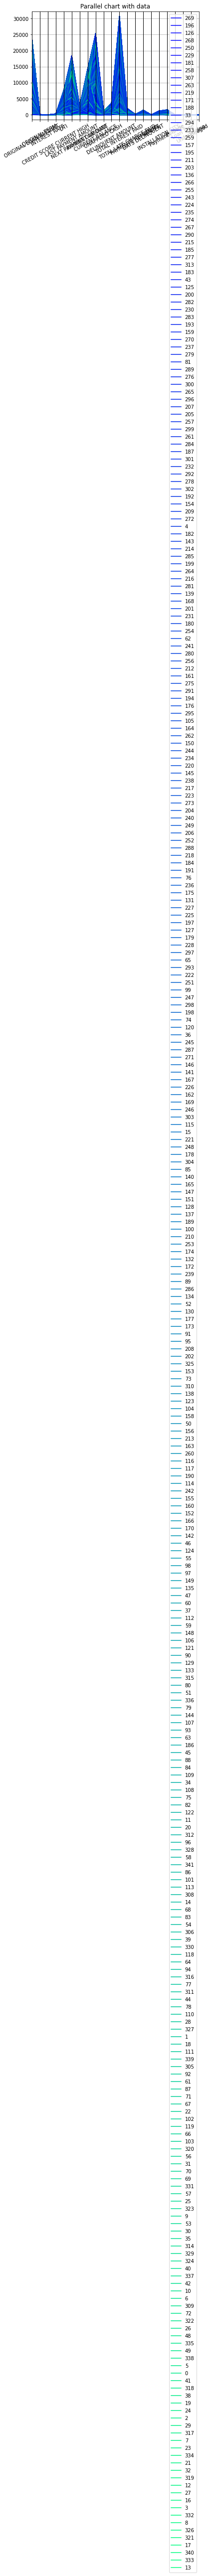

In [ ]:
fig1 = plt.figure()
pd.plotting.parallel_coordinates(df,
                                 'CREDIT SCORE',    # class_column
                                  colormap='winter'
                                  )
plt.xticks(rotation=30)
plt.title("Parallel chart with data")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text major ticklabel objects>)

Text(0.5, 1.0, 'Parallel chart with data')

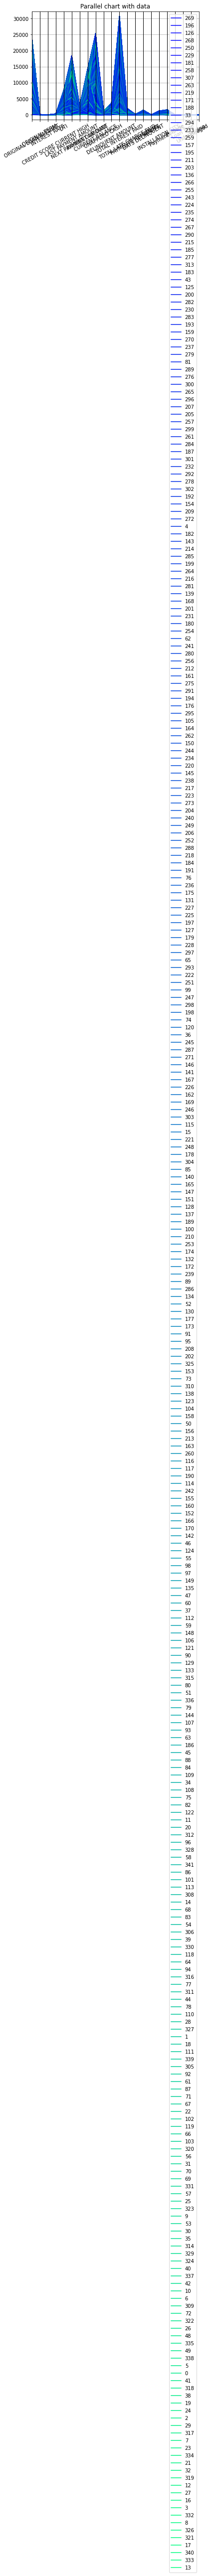

In [ ]:
fig2 = plt.figure()
ax = pd.plotting.parallel_coordinates(df,
                                 'CREDIT SCORE',
                                  colormap= plt.cm.winter
                                  )

plt.xticks(rotation=30)
plt.title("Parallel chart with data")

Text(0.5, 1.0, 'Andrews plots with data')

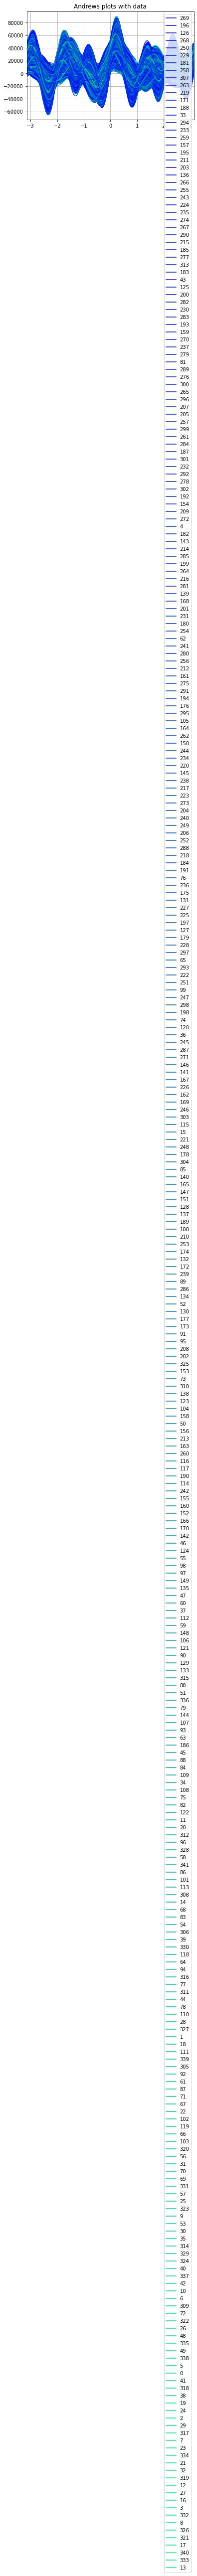

In [ ]:
fig3 = plt.figure()
pd.plotting.andrews_curves(df,
                           'CREDIT SCORE',
                           colormap = 'winter')

plt.title("Andrews plots with data")


# splitting the data into train and test

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(
                                                    X_c,                   # Data features
                                                    y_c,                   # Target column
                                                    test_size = 0.35,     # split-ratio
                                                    shuffle=True    
                                                    )

In [ ]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install --upgrade xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 255.9 MB 52 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
git clone --recursive https://github.com/dmlc/xgboost
cd xgboost
cp make/minimum.mk ./config.mk
make -j4
cd python-package


# Pipeline steps
# steps: List of (name, transform) tuples
#       (implementing fit/transform) that are
#       chained, in the order in which they
#       are chained, with the last object an
#       estimator.
#      Format: [(name, transformer), (name, transformer)..(name, estimator)]

In [ ]:
steps_xg = [('sts', ss() ),
            ('pca', PCA()),
            ('xg',  XGBClassifier(silent = False,
                                  n_jobs=2)
             ( [ ("le",LabelEncoder), ("ohe", OneHotEncoder)])
                                                                  
            )
            ]


TypeError: ignored

# Instantiate Pipeline object

In [ ]:
pipe_xg = Pipeline(steps_xg)

In [ ]:
pipe_xg.get_params()

In [ ]:
pip install scikit-optimize

#Cross Validation

In [ ]:
import numpy as np
import pandas as pd


# 1.2 Data pre-processing
#     z = (x-mean)/stdev
from sklearn.preprocessing import StandardScaler as ss

# 1.3 Dimensionality reduction and noise removal
from sklearn.decomposition import PCA

# 1.4 Data splitting and model parameter search
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# 1.5 Model pipelining
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# 1.6 Hyperparameter optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# 1.7.1
#     pip install scikit-optimize
#     pip install 'scikit-optimize[plots]'
#     Refer: https://github.com/scikit-optimize/scikit-optimize
#     conda install -c conda-forge scikit-optimize
from skopt import BayesSearchCV 
from skopt.space import Real, Categorical, Integer

# 1.8 Modeling modules
#     Call sklearn wrapper of xgboost
# """Scikit-Learn Wrapper interface for XGBoost."""
#  """Implementation of the Scikit-Learn API for XGBoost.
# https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn
# Stackoverflow:
# https://stackoverflow.com/a/34696477
# https://stackoverflow.com/a/46947191
# Install as: conda install -c anaconda py-xgboost
from xgboost.sklearn import XGBClassifier

# 1.9 Model evaluation metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix

# 1.10
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance

# 1.11 Permutation feature importance
from sklearn.inspection import permutation_importance

# 1.12 Misc
import time
import os
import gc
import random

# 1.13 Used in Randomized parameter search
from scipy.stats import uniform

# 1.14
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 1.15 Set option to dislay many rows
pd.set_option('display.max_columns', 100)

#Hyperparameter tuning both using Grid Search and Randomized Search

In [ ]:
print("\n\n--Which parameters can be tuned?--\n\n")
pipe_xg.get_params()

In [ ]:
parameters = {'xg__learning_rate':  [0.03, 0.05], # learning rate decides what percentage
                                                  #  of error is to be fitted by
                                                  #   by next boosted tree.
                                                  # See this answer in stackoverflow:
                                                  # https://stats.stackexchange.com/questions/354484/why-does-xgboost-have-a-learning-rate
                                                  # Coefficients of boosted trees decide,
                                                  #  in the overall model or scheme, how much importance
                                                  #   each boosted tree shall have. Values of these
                                                  #    Coefficients are calculated by modeling
                                                  #     algorithm and unlike learning rate are
                                                  #      not hyperparameters. These Coefficients
                                                  #       get adjusted by l1 and l2 parameters
              'xg__n_estimators':   [200,  300],  # Number of boosted trees to fit
                                                  # l1 and l2 specifications will change
                                                  # the values of coeff of boosted trees
                                                  # but not their numbers

              'xg__max_depth':      [4,6],
              'pca__n_components' : [25,30],
              'xg__booster': ['gbtree','gblinear']
              }                               # Total: 2 * 2 * 2 * 2

In [ ]:
# 6.3.1 Define revised dictionary
#       This takes 3.5 minutes
parameters = {'xg__learning_rate':  [0.03, 0.05],
               'xg__max_depth':      [4,6],
 
              'pca__n_components' : [25,30],
               }                               # Total: 2 * 2 * 2 * 2

In [ ]:
clf = GridSearchCV(pipe_xg,            # pipeline object
                   parameters,         # possible parameters
                   n_jobs = 2,         # USe parallel cpu threads
                   cv =2 ,             # No of folds
                   verbose =1,         # Higher the value, more the verbosity
                   scoring = ['accuracy', 'roc_auc'],  # Metrics for performance
                   refit = 'roc_auc'   # Refitting final model on what parameters?
                                       # Those which maximise auc
                   )

In [ ]:
#Start fitting pipeline to data
print("\n\n--Takes time...---\n")
start = time.time()
clf.fit(X_train, y_train)
end = time.time()
print()
(end - start)/60 

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LogisticRegression

In [ ]:
iris=load_iris()

In [ ]:
X=iris.data

In [ ]:
Y=iris.target

In [ ]:
logreg=LogisticRegression()

In [ ]:
kf=KFold(n_splits=5)

In [ ]:
score=cross_val_score(logreg,X,Y,cv=kf)

In [ ]:
print("Cross Validation Scores are {}".format(score))

Cross Validation Scores are [1.         1.         0.86666667 0.93333333 0.83333333]


In [ ]:
print("Average Cross Validation score :{}".format(score.mean()))

Average Cross Validation score :0.9266666666666665
